# Social Networks and Recommendation Systems - task 3

# Exercice 1

Draw a histogram with marked $\sigma$ intervals for random variables
from the normal distribution N(0,1).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

In [65]:
np.random.seed(77)
x = np.random.normal(loc=0.0, scale=1.0, size=2000)

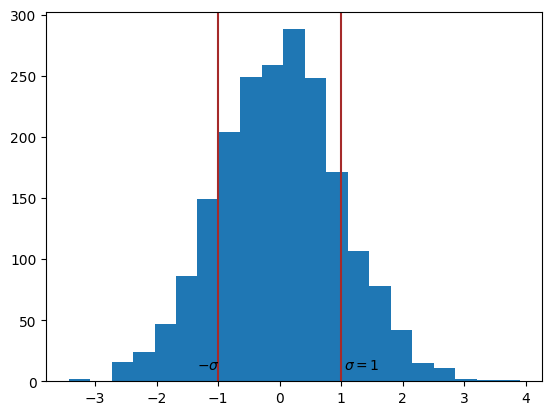

In [66]:
plt.hist(x, bins = 21)
plt.axvline(x=1, color = 'brown')
plt.axvline(x=-1, color = 'brown')
plt.text(x = 1.05, y = 10, s = r'$\sigma=1$')
plt.text(x = -1.35, y = 10, s = r'$-\sigma$')
plt.show()

# Exercice 2

Check the Pareto rule for variables from the geometric distribution.

In [68]:
np.random.seed(44)
N = 2000
x = np.random.geometric(p = 0.2, size=N)

In [33]:
x

array([6, 2, 2, ..., 2, 6, 2])

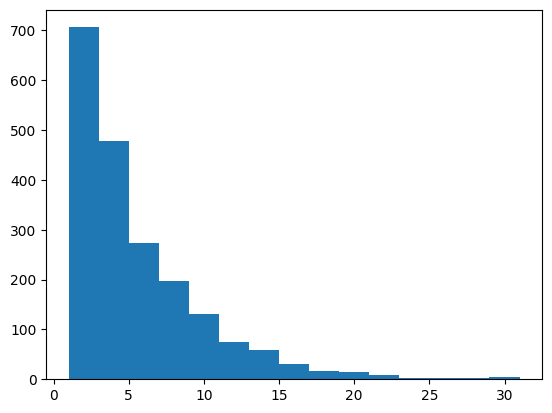

In [69]:
plt.hist(x, bins = 15)
plt.show()

In [73]:
print("Sum of all values: " , np.sum(x))
print("20 % of the sum of all values: " , 0.2*np.sum(x))

Sum of all values:  10036
20 % of the sum of all values:  2007.2


In [71]:
# checking if sum of 80% of smallest observations are similar to 20% of the sum of all values
x_ordered = sorted(x)
0.8*N

1600.0

In [72]:
np.sum(x_ordered[0:(int(0.8*N))])

5174

The values **2007.2** and **5174** are too different. The Pareto rule is not fulfilled for geometric distribution.

Sum of 80% of the smallest values equal ~ 50% of the sum of all values

# Exercice 3
Draw a histogram with marked $\sigma$ intervals for variables drawn
from a continuous power distribution


In [102]:
np.random.seed(44)
N = 2000
x = np.random.uniform(low=0.0, high=1.0, size=N)

In [17]:
x

array([0.83484215, 0.1047961 , 0.74464048, ..., 0.10598769, 0.06002067,
       0.01660628])

In [103]:
# CDF of the continuous power distribution:

# 1 - (x/x_min)**(1-alpha)    (*)

# inverse of (*):

# P_inv(x) = x_min * (1-x)**(1/1-alpha)

alpha = 2
x_min = 0.5

x2 =  x_min * (1-x)**(1/(1-alpha))

# x2 = x_min/(x**(1/(alpha)))

In [110]:
sigma = np.std(x2)
sigma

20.67623009791457

In [109]:
np.min(x2)

0.5001819537755007

In [112]:
'sigma' + str(sigma)

'sigma20.67623009791457'

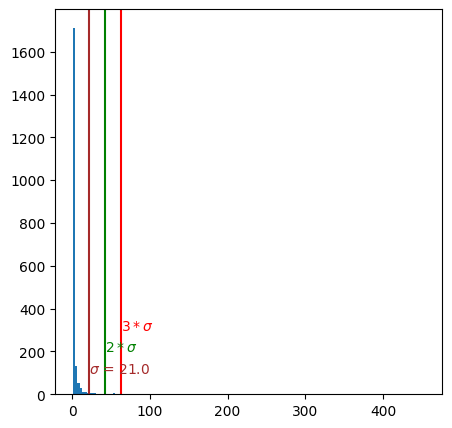

In [115]:
plt.hist(x2, bins = 150)
plt.axvline(x=x_min + sigma, color = 'brown')
plt.axvline(x=x_min + 2*sigma, color = 'green')
plt.axvline(x=x_min + 3*sigma, color = 'red')
plt.text(x = x_min + sigma, y = 100, s = r'$\sigma$ = ' + str(np.round(sigma, 0)), color = 'brown')
plt.text(x = x_min + 2*sigma, y = 200, s = r'$2*\sigma$', color = 'green')
plt.text(x = x_min + 3*sigma, y = 300, s = r'$3*\sigma$', color = 'red')
plt.show()

In [106]:
print("Sum of all values: " , np.sum(x2))
print("20 % of the sum of all values: " , 0.2*np.sum(x2))

Sum of all values:  7622.626641183457
20 % of the sum of all values:  1524.5253282366914


In [107]:
# checking if sum of 80% of smallest observations are similar to 20% of the sum of all values
x2_ordered = sorted(x2)
0.8*N

1600.0

In [108]:
np.sum(x2_ordered[0:(int(0.8*N))])

1621.9334037371061

**Additional:** Values of 1621 and 1524 are similar -- it is comparable to Pareto distribution.

Sum of 80% of the smallest values equal ~ 20% of the sum of all values.

# Exercice 4

In [117]:
np.random.seed(44)
s = 2
x = np.random.zipf(a = s, size=N)

In [118]:
print("Sum of all values: " , np.sum(x))
print("20 % of the sum of all values: " , 0.2*np.sum(x))

Sum of all values:  10578
20 % of the sum of all values:  2115.6


In [119]:
# checking if sum of 80% of smallest observations are similar to 20% of the sum of all values
x_ordered = sorted(x)
0.8*N

1600.0

In [120]:
np.sum(x_ordered[0:(int(0.8*N))])

2054

**Conclusions:** Values of **2054** and **2115.6** are comparable -- zeta distribution fulfills the Pareto rule.
    
Sum of 80% of the smallest values equal ~ 20% of the sum of all values

# Exercice 5

In [2]:
import networkx as nx

### Generating BA network and ER graphs

In [171]:
# generate BA network and ER graphs using built-in functions.
er = nx.erdos_renyi_graph(n = 10, p = 0.3, seed=155)
ba = nx.barabasi_albert_graph(n = 10, m = 3, seed=155)

### Presence of hubs

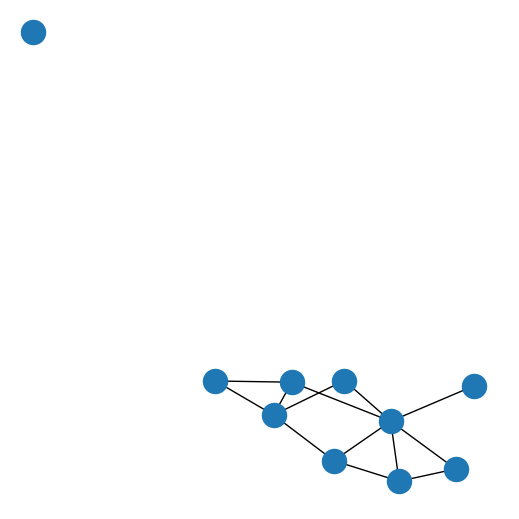

In [172]:
nx.draw(er)

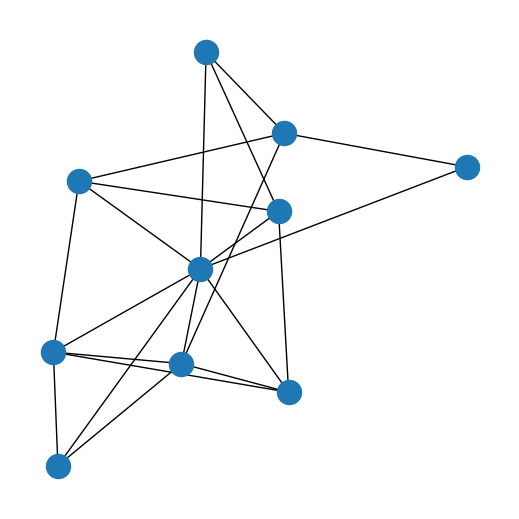

In [173]:
nx.draw(ba)

BA network is more likely to create hubs -- while adding a node, the high degree nodes are preferred to be linked with the newly added node by an edge.

In the 2nd figure above (BA network) we can see a hub with 8 edges (maximal numer of edges is 9).

In ER graph, the edges are created at random -- the probability of hubs are much lower.

### Drawing histograms of vertex degrees

In [191]:
# generate BA network and ER graphs using built-in functions.
er = nx.erdos_renyi_graph(n = N, p = 0.3, seed=155)
ba = nx.barabasi_albert_graph(n = N, m = 4, seed=155)

In [198]:
degrees_er = [v[1] for v in er.degree]
degrees_ba = [v[1] for v in ba.degree]

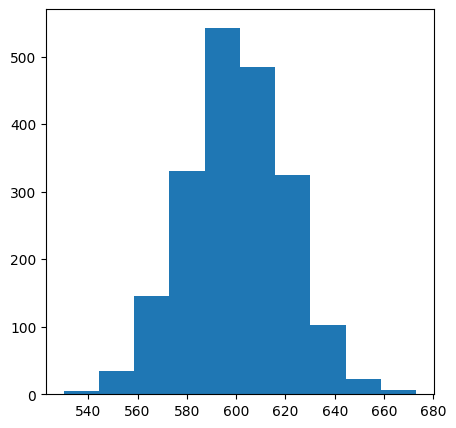

In [199]:
plt.hist(degrees_er)
plt.show()

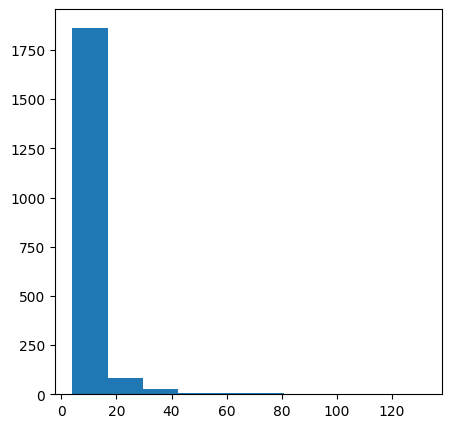

In [200]:
plt.hist(degrees_ba)
plt.show()

In [207]:
x = degrees_ba

print("Sum of all values: " , np.sum(x))
print("20 % of the sum of all values: " , 0.2*np.sum(x))



Sum of all values:  15968
20 % of the sum of all values:  3193.6000000000004


In [208]:
# checking if sum of 80% of smallest observations are similar to 20% of the sum of all values
x_ordered = sorted(x)
0.8*N

1600.0

In [209]:
np.sum(x_ordered[0:(int(0.8*N))])

# it does not have pareto distribution

8430

### Computing estimators of expectation and variance for vertex degrees, N = 2000 nodes

In [216]:
# for ER graph(N = 2000, p = 0.3):

print("ER Expected value: " + str(np.mean(degrees_er)))
print("ER Variance: " + str(np.var(degrees_er)))

ER Expected value: 600.128
ER Variance: 413.66961599999996


Expected value ~ N * p

Variance ~ N * p * (1-p)

In [214]:
# for BA network(N = 2000, m = 4):

print("ER Expected value: " + str(np.mean(degrees_ba)))
print("ER Variance: " + str(np.var(degrees_ba)))


ER Expected value: 7.984
ER Variance: 83.501744


In [222]:
ms = [2,3,4,5,6,7,8,9,10,20,30,40,50]

es = []
varss = []

for m in ms:
    
    ba = nx.barabasi_albert_graph(n = N, m = m, seed=155)
    degrees_ba = [v[1] for v in ba.degree]
    
    es.append(np.mean(degrees_ba))
    varss.append(np.var(degrees_ba))


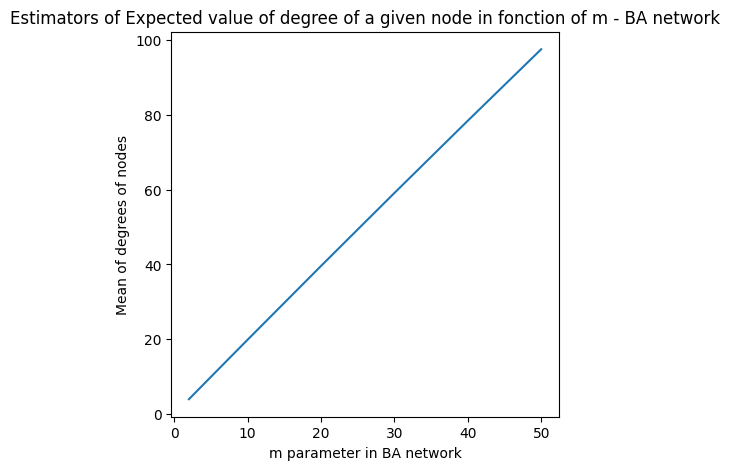

In [229]:
plt.plot(ms, es )
plt.title("Estimators of Expected value of degree of a given node in fonction of m - BA network")
plt.ylabel("Mean of degrees of nodes")
plt.xlabel("m parameter in BA network")
plt.show()

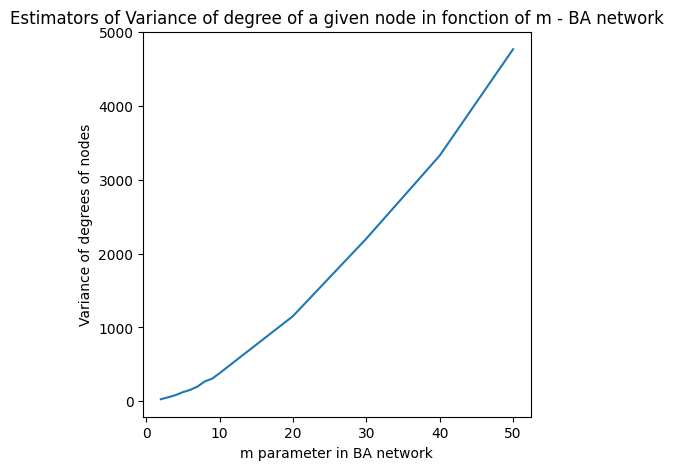

In [230]:
plt.plot(ms, varss )
plt.title("Estimators of Variance of degree of a given node in fonction of m - BA network")
plt.ylabel("Variance of degrees of nodes")
plt.xlabel("m parameter in BA network")
plt.show()

**BA network** -- the dependence on m on expected value is linear, and quadratic in case of variance, they were much smaller than in case of ER graph, but still, they depend on m

**ER graph:**
    
Expected value ~ N * p

Variance ~ N * p * (1-p)

# P3.3 - simulated annealing with spring method

Implement the graph visualization based on the spring method
according to the specification below 

In [2]:
G = nx.erdos_renyi_graph(n = 8, p = 0.5, seed=155)

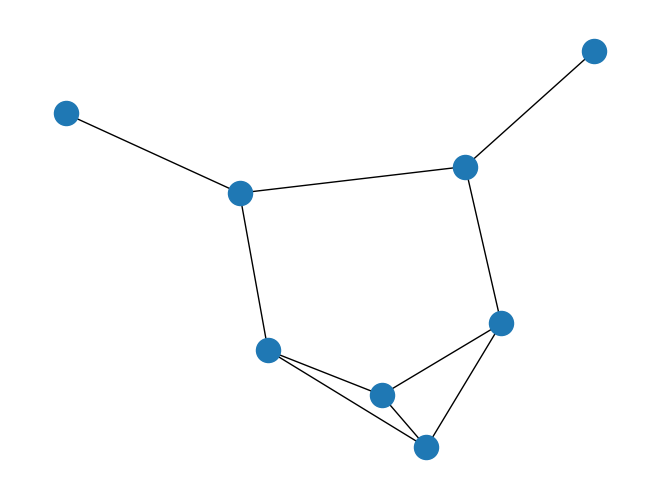

In [20]:
nx.draw(G)

In [3]:
np.random.seed(5734234)
l1 = np.random.normal(loc = 6, scale = 10, size = 10) # could be random
l2 = np.random.normal(loc = 6, scale = 10, size = 10) # could be random

# l1 = np.linspace(2,21,  10) # could be random
# l2 = np.linspace(2,21, 10) # could be random

coords = []

for a, b in zip( l1, l2 ):
    coords.append( [ a, b ] )

print( coords )

nx.set_node_attributes(G, coords, "coords")
coords_attr = nx.get_node_attributes(G, 'coords')

[[11.995193760826178, -2.0671256486908938], [16.62247439881341, 3.3151218320373026], [-0.4523713052091125, 4.7959209106241865], [17.116317539440296, -1.2885921125641033], [7.255971475210227, 6.095685857513248], [17.883707319553384, 8.3798386427326], [20.936194046277713, -6.285505158889867], [0.04887027932677501, 14.58618317951901], [22.31891199001653, 1.8677159300717232], [-2.823692680908735, 5.870811690626895]]


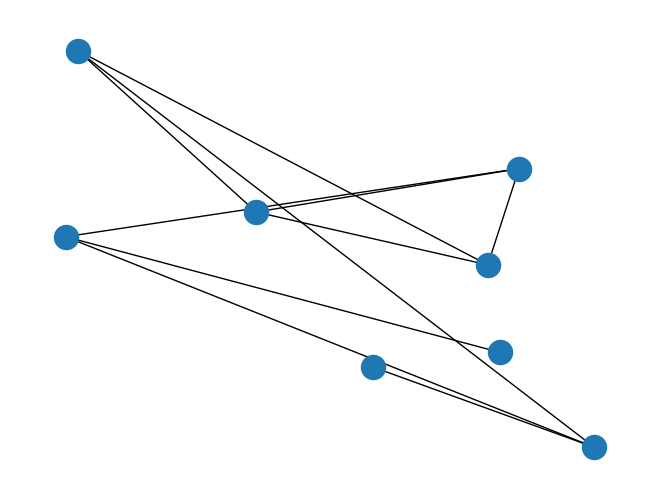

In [4]:
nx.draw(G, coords)

In [5]:
C = 10
D = 0.01

np.random.seed(573)

SPRING_NEUTRAL_POINT = 4 # neutral length*
N_OF_ITERATIONS = 1500
N_OF_MOVES_PER_IT = 10

energies_saved = []
coords_saved = []

for j in range(N_OF_ITERATIONS):
    if j % 200 == 100:  
        print("ITERATION NUMBER " + str(j))
        
    # create moves for this iteration j
    moves = []
    for k in range(N_OF_MOVES_PER_IT):
        move = np.random.normal(loc = 0, scale = 0.1,size = (10,2))
        moves.append(move)

    coords_attr2 = nx.get_node_attributes(G, 'coords')
    
    total_energies = []

    for i in range(len(moves)):

        # perform a movement
        coords_attr = np.asarray(coords_attr2[0]) + moves[i]

        total_energy = 0
        for edge in G.edges:

            # calculate distance
            x1 = coords_attr[edge[0]][0]
            x2 = coords_attr[edge[1]][0]
            y1 = coords_attr[edge[0]][1]
            y2 = coords_attr[edge[1]][1]

            dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)

            # calculate spring energy, check with respect to spring neutral point
        #     if dist > SPRING_NEUTRAL_POINT:

            spring_energy = C * (dist-SPRING_NEUTRAL_POINT)**2

        #     spring_energy = C*((x1-x2)^2 + (y1-y2)^2)  # C*x^2

            # add it to total_energy
            total_energy += spring_energy
            
            
        for v in G.nodes:  
            for w in G.nodes:
                if v == w:
                    continue

                # calculate distance
                x1 = coords_attr[v][0]
                x2 = coords_attr[w][0]
                y1 = coords_attr[v][1]
                y2 = coords_attr[w][1]

                dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)

                # electric energy

                el_energy = D / dist


                # add it to total_energy    
                total_energy += el_energy

        # add total_energy to total_energies
        total_energies.append(total_energy)


    
    if j == 0 or (min(total_energies) <= old_minimal_energy):
        print("success with lowering the total energy!, " + str(min(total_energies)))
        
            # get the best move, minimalizing the total energy:
        index_of_minimal_energy_move = np.argmin(total_energies)
        energies_saved.append(min(total_energies))
        
        new_coords = np.asarray(coords_attr2[0]) + moves[index_of_minimal_energy_move]
        
        # perpetuate the best movement
        nx.set_node_attributes(G, new_coords, "coords")
        old_minimal_energy = min(total_energies)
        coords_saved.append(new_coords)




success with lowering the total energy!, 18746.379847393473
success with lowering the total energy!, 18524.174418580005
success with lowering the total energy!, 18259.70791221423
success with lowering the total energy!, 18010.031379404198
success with lowering the total energy!, 17651.09901713601
success with lowering the total energy!, 17332.626634919445
success with lowering the total energy!, 17144.577207191043
success with lowering the total energy!, 16861.03114570041
success with lowering the total energy!, 16620.083467209064
success with lowering the total energy!, 16378.891120826598
success with lowering the total energy!, 16061.751662558683
success with lowering the total energy!, 15845.89269377768
success with lowering the total energy!, 15574.616399178754
success with lowering the total energy!, 15215.753715449222
success with lowering the total energy!, 14927.273566846698
success with lowering the total energy!, 14554.808943747663
success with lowering the total energy!, 143

success with lowering the total energy!, 1.422467892015551
success with lowering the total energy!, 1.354010052334078
success with lowering the total energy!, 1.156317999132226
success with lowering the total energy!, 1.0743294383749642
success with lowering the total energy!, 0.7896186895210355
success with lowering the total energy!, 0.7011749064501809
success with lowering the total energy!, 0.523630359327537
success with lowering the total energy!, 0.5138474305401005
ITERATION NUMBER 300
success with lowering the total energy!, 0.500848176846279
success with lowering the total energy!, 0.48802924765157263
success with lowering the total energy!, 0.40564247246482915
ITERATION NUMBER 500
ITERATION NUMBER 700
success with lowering the total energy!, 0.39752347601999594
ITERATION NUMBER 900
ITERATION NUMBER 1100
ITERATION NUMBER 1300


In [120]:
coords_attr2 = nx.get_node_attributes(G, 'coords')

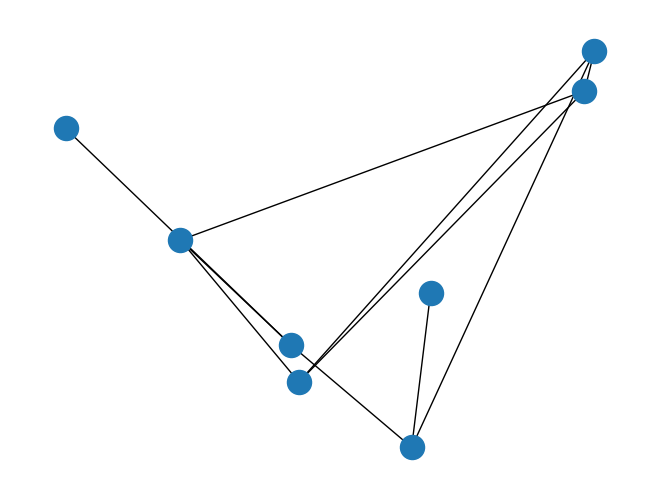

In [145]:
nx.draw(G, coords_attr2[0])

In [138]:
energies_saved

[943.4341103898109,
 940.2722403190546,
 901.5572103699625,
 820.6195361349967,
 633.0463879337156,
 632.987309894012,
 565.8103168750982,
 515.0072782622044]

In [6]:
import networkx as nx
import matplotlib.animation as animation
import matplotlib.pyplot as plt
import random

In [6]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

# points = [(0.1, 0.5), (0.5, 0.5), (0.9, 0.5)]
 
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(5,5)

# G_to_animate = G
def animate(i):
    ax.clear()
    # Get the point from the points list at index i
#     G_to_animate = nx.set_node_attributes(G, new_coords, "coords")
    # Plot that point using the x and y coordinates
    nx.draw(G, coords_saved[i], ax=ax)
    # Set the x and y axis to display a fixed range
    ax.set_xlim([-2, 30])
    ax.set_ylim([-12, 30])
anim = FuncAnimation(fig, animate, frames=len(coords_saved),
                    interval=400, repeat=False)
plt.close()

In [7]:
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
anim.event_source.stop()
anim.save("simple_animation.gif", dpi=300,
         writer=PillowWriter(fps=10))

# P3.1 - Pre-defined graph layout

Read documentation of the pre-defined graph layout functions
in your chosen environment. 

For the selected real graph, test several visualization methods.

In [5]:
# separate books

thrones1series = pd.read_csv("gameofthrones/data/got-s1-edges.csv")
labels1series = pd.read_csv("gameofthrones/data/got-s1-nodes.csv")

super_map = pd.Series(labels1series.Label.values,index=labels1series.Id).to_dict() 
thrones1series['Source'] = thrones1series['Source'].map(super_map)
thrones1series['Target'] = thrones1series['Target'].map(super_map)
thrones1series.head()

,Source,Target,Weight,Season
0,Ned,Robert,192,1
1,Daenerys,Jorah,154,1
2,Jon,Sam,121,1
3,Petyr,Ned,107,1
4,Ned,Varys,96,1


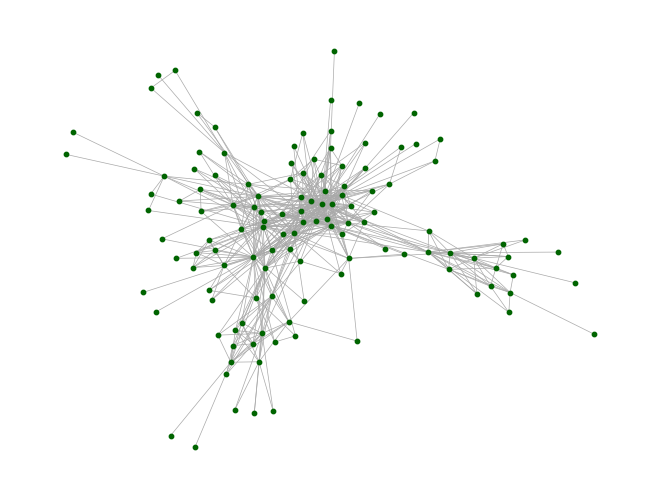

In [22]:
G = nx.from_pandas_edgelist(thrones1series, 'Source', 'Target', edge_attr='Weight')

nx.draw(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)

plt.show()


### 1. Spring layout

Default layout used by ns.draw() function

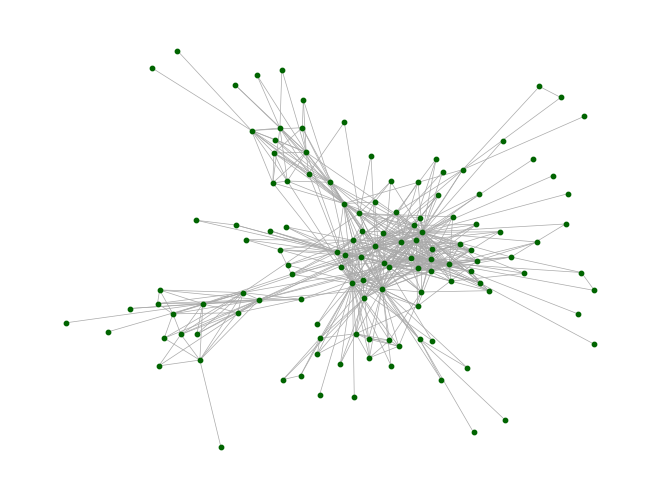

In [23]:
nx.draw_spring(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 2. Spectral layout

The layout uses the eigenvectors of a matrix, such as the Laplace matrix of the graph, as Cartesian coordinates of the graph's vertices.

The idea of the layout is to compute the **2 smallest non-zero eigenvalues** and corresponding eigenvectors of the Laplacian matrix of the graph and then use those for actually placing the nodes.

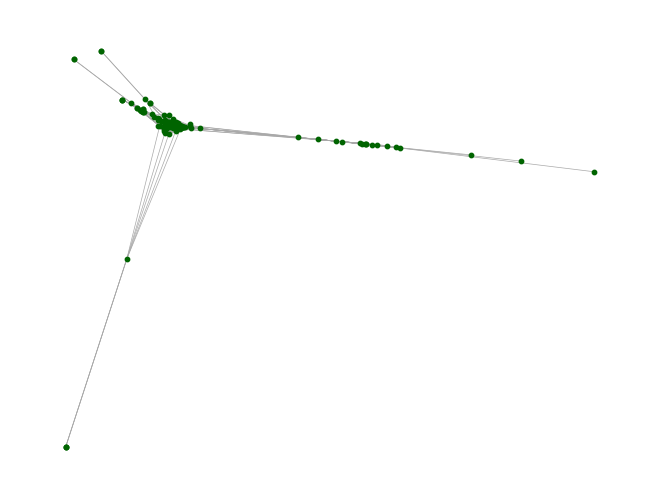

In [19]:
nx.draw_spectral(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 3. Kamada-kawai layout

The Kamada-Kawai graph layout attempts to position nodes on the space so that the geometric (Euclidean) distance between them is as close as possible to the graph-theoretic (path) distance between them.

Attention! The layout is computed each time this function is called.

It is much more efficient to call kamada_kawai_layout directly and reuse the result.

G = nx.complete_graph(5)

pos = nx.kamada_kawai_layout(G)

nx.draw(G, pos=pos)

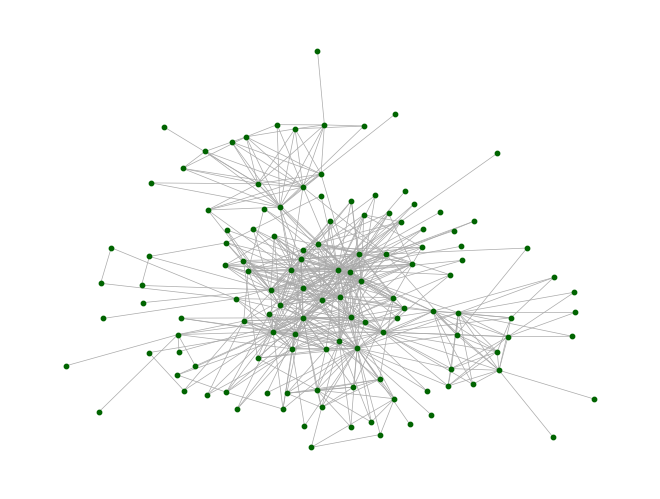

In [17]:
nx.draw_kamada_kawai(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 4. Circular layout

Nodes are placed in a circle.

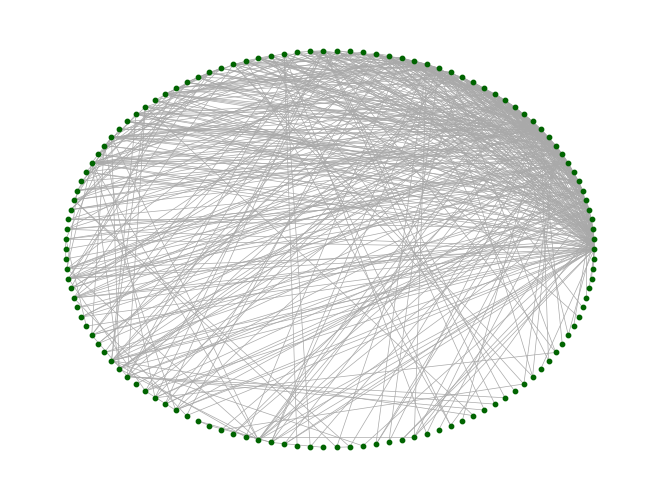

In [28]:
nx.draw_circular(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 5. Shell layout

The shell layout places nodes in concentric circles. Can visualize more nodes than circular layout.

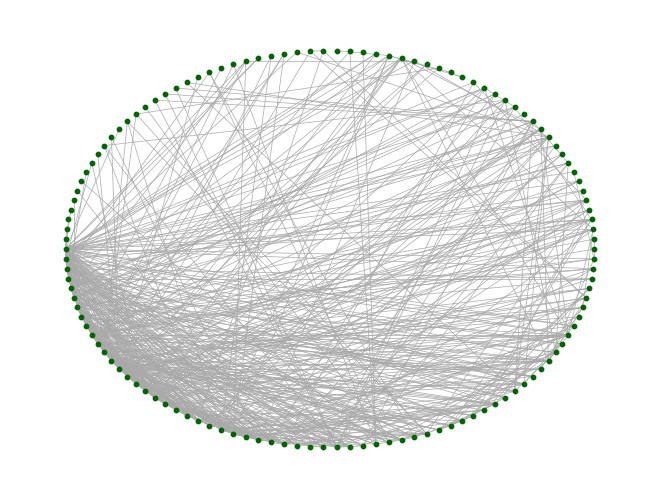

In [27]:
nx.draw_shell(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 6. Random layout

Nodes are placed at random.

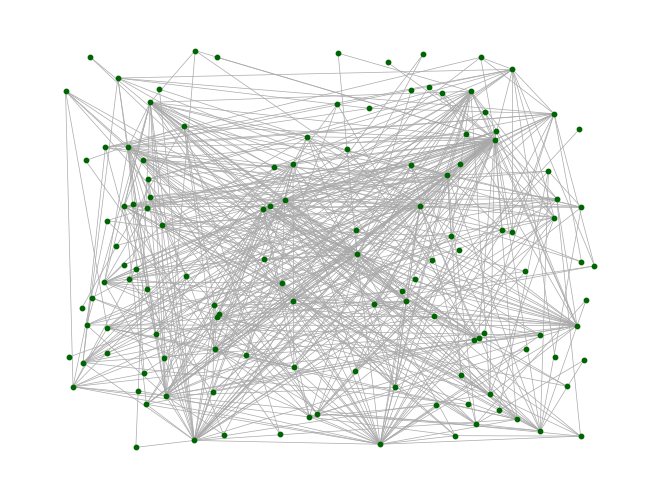

In [25]:
nx.draw_random(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()

### 7. Planar layout

Uniquely for planar graphs -- this case of graph is not planar.

This layout makes sure that there will be no edge intersection.

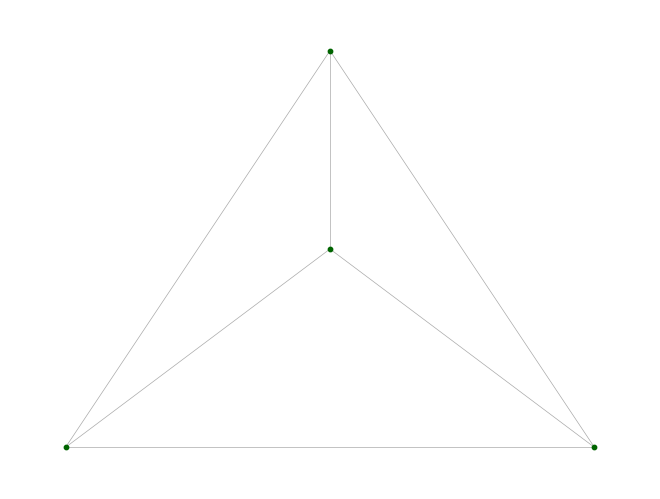

In [41]:
G = nx.complete_graph(4)

nx.draw_planar(G, node_size = 10, node_color = 'darkgreen', edge_color = 'darkgrey', width = 0.5)
plt.show()


Unfrotunately in this real graph, there is no much difference between circular and shell layouts.

Differences could be shown for example at:

https://math.libretexts.org/Bookshelves/Scientific_Computing_Simulations_and_Modeling/Book%3A_Introduction_to_the_Modeling_and_Analysis_of_Complex_Systems_(Sayama)/15%3A_Basics_of_Networks/15.04%3A_Visualizing_Networks_with_NetworkX

In [33]:
from IPython.display import Image
from IPython.core.display import HTML 
Image(url = "https://math.libretexts.org/@api/deki/files/9063/Fig._15.4_pt1.png?revision=2")


In [34]:
Image(url="https://math.libretexts.org/@api/deki/files/9064/Fig._15.4_pt2.png?revision=2")